<a href="https://colab.research.google.com/github/JangAyeon/ToBigs/blob/master/%5B4%5DEnsemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install catboost

# **Load Data**

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action="ignore")


from matplotlib import pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import svm

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error

In [ ]:
df=pd.read_csv("ggstore_train.csv")
df_test=pd.read_csv("ggstore_test.csv")

In [ ]:
df.head() 

App  ... Id
0     Photo Editor & Candy Camera & Grid & ScrapBook  ...  0
1                                Coloring book moana  ...  1
2  U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...  ...  2
3                              Sketch - Draw & Paint  ...  3
4              Pixel Draw - Number Art Coloring Book  ...  4

[5 rows x 12 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5616 entries, 0 to 5615
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             5616 non-null   object 
 1   Category        5616 non-null   object 
 2   Rating          5616 non-null   float64
 3   Reviews         5616 non-null   int64  
 4   Size            5616 non-null   float64
 5   Installs        5616 non-null   float64
 6   Type            5616 non-null   int64  
 7   Price           5616 non-null   float64
 8   Content Rating  5616 non-null   object 
 9   Genres          5616 non-null   object 
 10  Last Updated    5616 non-null   object 
 11  Id              5616 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 526.6+ KB


In [ ]:
df_test.head()

App            Category  ...  Last Updated    Id
0  Dr.Android Repair Master 2017        PRODUCTIVITY  ...    2018-06-10  5617
1                     DR CONTROL              FAMILY  ...    2017-03-08  5618
2               Dr Driving Racer                GAME  ...    2018-06-14  5619
3  Dr. McDougall Mobile Cookbook  HEALTH_AND_FITNESS  ...    2015-01-26  5620
4                Dr. Seuss's ABC              FAMILY  ...    2018-02-26  5621

[5 rows x 11 columns]

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             1404 non-null   object 
 1   Category        1404 non-null   object 
 2   Reviews         1404 non-null   int64  
 3   Size            1404 non-null   float64
 4   Installs        1404 non-null   float64
 5   Type            1404 non-null   int64  
 6   Price           1404 non-null   float64
 7   Content Rating  1404 non-null   object 
 8   Genres          1404 non-null   object 
 9   Last Updated    1404 non-null   object 
 10  Id              1404 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 120.8+ KB


##**1.   Feature**




|Feature Î™Ö|ÏÑ§Î™Ö|
|------|---|
|App|Application name|
|Category|Category the app belongs to Overall user rating of the app (as when scraped)|
|Rating|Overall user rating of the app (as when scraped)|
|Reviews|Number of user reviews for the app (as when scraped)|
|Size|Size of the app (as when scraped)|
|Installs|Number of user downloads/installs for the app (as when scraped)|
|Type|Paid or Free|
|Price|Price of the app (as when scraped)|
|Content Rating|Age group the app is targeted at - Children / Mature 21+ / Adult|
|Genres|An app can belong to multiple genres (apart from its main category)|
|Last Updated|Date when the app was last updated on Play Store (as when scraped)|
|Id|Product Number of Application|

##**2.Target Data** : `Rating`<br>

In [ ]:
target="Rating"
con_var=['Rating','Reviews','Size','Installs','Price']

##**3.Data Size<br>**
5616 rows with 12 columns

In [ ]:
df.shape #train data shape

(5616, 12)

In [ ]:
df_test.shape #test data shape

(1404, 11)

#**Í≤∞Ï∏°Ïπò / Ïù¥ÏÉÅÏπò ÌôïÏù∏ & EDA**

##**1.Í≤∞Ï∏°Ïπò Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏùå**

In [ ]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Id                0
dtype: int64

##**2.Ïó∞ÏÜçÌòï Î≥ÄÏàò Î∂ÑÌè¨**

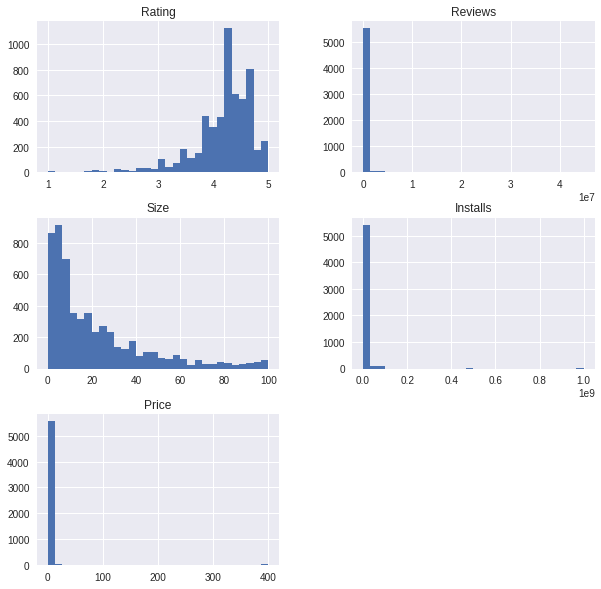

In [ ]:
df[con_var].hist(bins=30,figsize=(10,10)) #hist
plt.show()

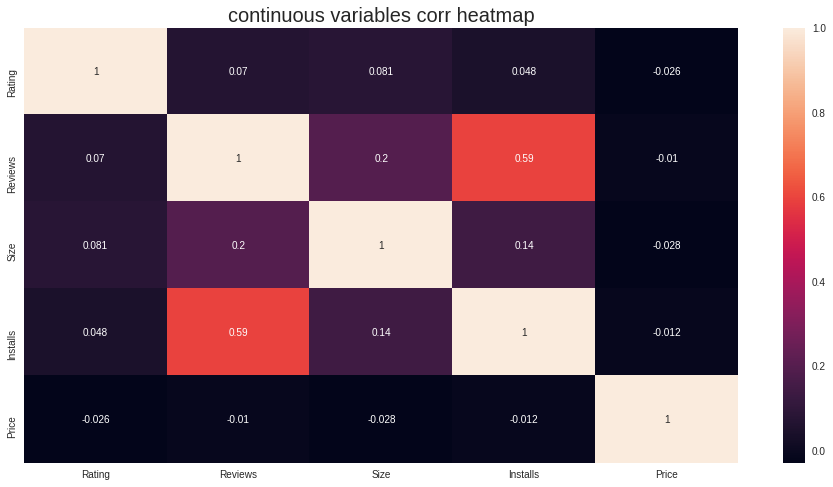

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(df[con_var].corr(), annot=True) #heapmap
plt.title('continuous variables corr heatmap', fontsize=20)
plt.show()

##**3.Feature**

###**1.`App`** 
**: ApplicationÏùò Î™ÖÏπ≠ÏúºÎ°ú Ïù¥ÏÉÅÏπò Ï°¥Ïû¨ X**


*   objectÌòïÏúºÎ°ú Ï∞®ÌõÑ Feature Engineering ÌïÑÏöî


In [ ]:
df["App"].value_counts() 

Pro 2018 - Series A and B                             1
Freecell CY                                           1
Kaspersky Mobile Antivirus: AppLock & Web Security    1
SketchBook - draw and paint                           1
Go                                                    1
                                                     ..
CS Browser | #1 & BEST BROWSER                        1
Sermon on Proverbs CH Spurgeon                        1
BW-DGS plugin                                         1
AP Mobile                                             1
Home Scouting¬Æ MLS Mobile                             1
Name: App, Length: 5616, dtype: int64

###**2.`Category`**
**: ApplicationÏù¥ ÏÜçÌïòÎäî Î∂ÑÎ•ò Î™ÖÏπ≠ÏúºÎ°ú Ïù¥ÏÉÅÏπò Ï°¥Ïû¨ X**


*   33Í∞ÄÏßÄ / 31Í∞ÄÏßÄ Î∂ÑÎ•ò Ï°¥Ïû¨

*   Game Í≥º Family Î∂ÑÎ•òÍ∞Ä Í∞ÄÏû• ÌùîÌï®
*   objectÌòïÏúºÎ°ú Ï∞®ÌõÑ Feature Engineering ÌïÑÏöî

In [ ]:
print("#",len(df["Category"].unique()),"number of Categories") ##ApplicationÏùò Ï¢ÖÎ•ò train dataÏóê 33Í∞ÄÏßÄ Ï°¥Ïû¨
print(df["Category"].value_counts())

# 33 number of Categories
FAMILY                 1102
GAME                    657
TOOLS                   463
MEDICAL                 253
PERSONALIZATION         227
LIFESTYLE               220
FINANCE                 201
PHOTOGRAPHY             175
PRODUCTIVITY            173
HEALTH_AND_FITNESS      172
BUSINESS                166
COMMUNICATION           153
SPORTS                  143
SHOPPING                139
SOCIAL                  122
DATING                  121
NEWS_AND_MAGAZINES      114
BOOKS_AND_REFERENCE     109
TRAVEL_AND_LOCAL        108
VIDEO_PLAYERS            90
EDUCATION                88
MAPS_AND_NAVIGATION      76
FOOD_AND_DRINK           69
ENTERTAINMENT            64
LIBRARIES_AND_DEMO       57
ART_AND_DESIGN           57
AUTO_AND_VEHICLES        55
HOUSE_AND_HOME           48
COMICS                   46
PARENTING                43
WEATHER                  37
BEAUTY                   34
EVENTS                   34
Name: Category, dtype: int64


Text(0.5, 1.0, 'Distribution of Category')

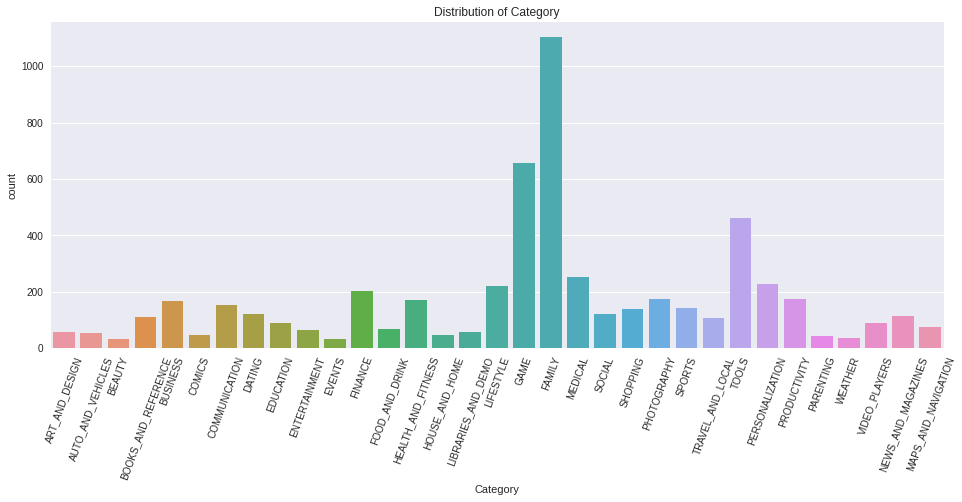

In [ ]:
plt.figure(figsize=(16,6)) ##ApplicationÏùò Î∂ÑÎ•ò Î∂ÑÌè¨
sns.countplot(x="Category",data=df)
plt.xticks(rotation=70)
plt.title("Distribution of Category")

In [ ]:
print("#",len(df_test["Category"].unique()),"number of Categories") ##ApplicationÏùò Ï¢ÖÎ•ò test dataÏóê 31Í∞ÄÏßÄ Ï°¥Ïû¨
print(df_test["Category"].value_counts())

# 31 number of Categories
FAMILY                 408
GAME                   175
TOOLS                  162
SPORTS                  78
FINANCE                 57
BUSINESS                56
PRODUCTIVITY            50
LIFESTYLE               49
PERSONALIZATION         47
NEWS_AND_MAGAZINES      40
COMMUNICATION           35
SOCIAL                  34
TRAVEL_AND_LOCAL        33
BOOKS_AND_REFERENCE     32
PHOTOGRAPHY             29
VIDEO_PLAYERS           22
HEALTH_AND_FITNESS      19
MAPS_AND_NAVIGATION     18
WEATHER                 13
MEDICAL                 13
AUTO_AND_VEHICLES        8
SHOPPING                 7
EVENTS                   4
LIBRARIES_AND_DEMO       3
FOOD_AND_DRINK           3
BEAUTY                   3
HOUSE_AND_HOME           2
PARENTING                1
ART_AND_DESIGN           1
DATING                   1
COMICS                   1
Name: Category, dtype: int64


Text(0.5, 1.0, 'Distribution of Category')

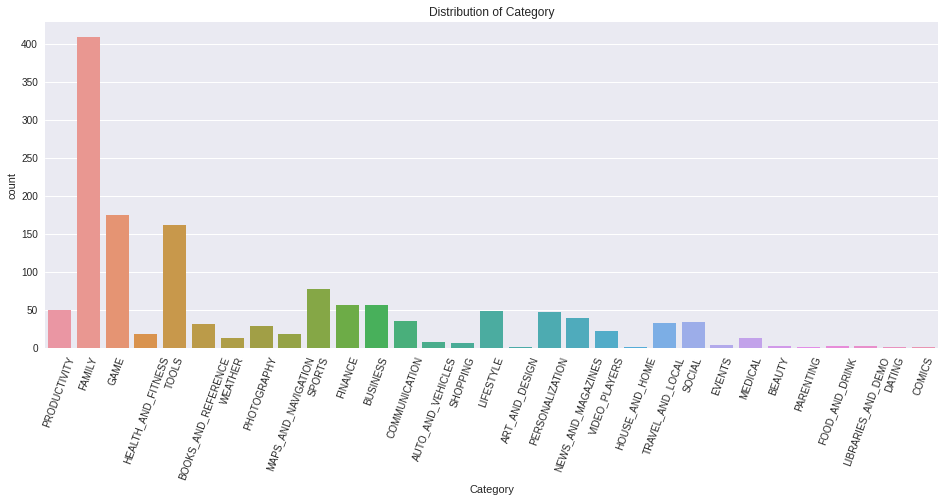

In [ ]:
plt.figure(figsize=(16,6)) ##ApplicationÏùò Î∂ÑÎ•ò Î∂ÑÌè¨
sns.countplot(x="Category",data=df_test)
plt.xticks(rotation=70)
plt.title("Distribution of Category")

###**3.`Rating`**
**: ApplicationÏùò ÌèâÍ∞ÄÏßÄÌëúÎ°ú Ïù¥ÏÉÅÏπò Ï°¥Ïû¨ X**


*   ÌèâÍ∑†Ï†ÅÏúºÎ°ú 4Ï†êÎåÄÎ°ú ÌèâÍ∞ÄÎêòÎ©∞ Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú Ï¢ãÏùÄ ÌèâÏùÑ Î∞õÏùå

In [ ]:
df["Rating"].describe()

count    5616.000000
mean        4.177386
std         0.543153
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

Text(0.5, 1.0, 'Distribution of Rating')

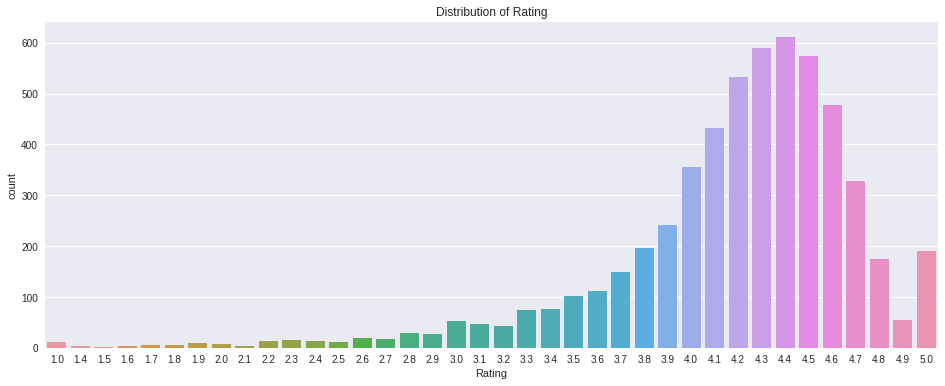

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(x="Rating",data=df)
plt.title("Distribution of Rating")

###**4.`Reviews`**
**: ApplicationÏùò ÏÇ¨Ïö© ÌõÑÍ∏∞ Í∞ØÏàòÎ°ú Ïù¥ÏÉÅÏπò Ï°¥Ïû¨ X**




*   ÎåÄÎ∂ÄÎ∂ÑÏùò Ïñ¥ÌîåÏùÄ 1MÍ∞úÏùò Î¶¨Î∑∞Î•º Í∞ÄÏßê 
* ÏùºÎ∂Ä 3M~4MÍ∞úÏùò Î¶¨Î∑∞Î•º Í∞ÄÏßÄÎäî Ïñ¥ÌîåÏù¥ ÏûàÏßÄÎßå Ïù∏Í∏∞ Ïñ¥Ìîå Îì±Ïùò Í≤ΩÏö∞ Ï∂©Î∂ÑÌûà Í∞ÄÎä•Ìïú ÏÉÅÌô©Ïù¥ÎùºÍ≥† ÏÉùÍ∞ÅÌï¥ Ïù¥ÏÉÅÏπòÎ°ú Í≥†Î†§X<br>
=> "Clash of Clans", "DU Battery Saver - Battery Charger & Battery Life", "Need for Speed‚Ñ¢ No Limits" Îì±Ïùò Ïñ¥ÌîåÏùò Í≤ΩÏö∞ Ïù¥Ïóê Ìï¥ÎãπÎê® 

In [ ]:
df["Reviews"].value_counts() 

3          58
2          55
5          53
4          51
1          51
           ..
3079        1
205830      1
54034       1
1026        1
1385093     1
Name: Reviews, Length: 3697, dtype: int64

In [ ]:
df["Reviews"].describe()

count    5.616000e+03
mean     1.686437e+05
std      1.126012e+06
min      1.000000e+00
25%      1.140000e+02
50%      2.158000e+03
75%      3.292125e+04
max      4.489172e+07
Name: Reviews, dtype: float64

In [ ]:
df[["App","Reviews"]].sort_values(by="Reviews",ascending=False)

App   Reviews
975                                    Clash of Clans  44891723
960                                    Subway Surfers  27722264
965                                      Clash Royale  23133508
961                                  Candy Crush Saga  22426677
247       UC Browser - Fast Download Private & Secure  17712922
...                                               ...       ...
1440  Anatomy & Physiology Vocabulary Exam Review App         1
4983                                      CT Checkout         1
3160                            Hey AJ! It's Bedtime!         1
3346                        AP Art History Flashcards         1
4123                                            MI-BP         1

[5616 rows x 2 columns]

In [ ]:
df_test[["App","Reviews"]].sort_values(by="Reviews",ascending=False)

App   Reviews
79    DU Battery Saver - Battery Charger & Battery Life  13479633
259                           Need for Speed‚Ñ¢ No Limits   3344300
279                        Modern Combat 5: eSports FPS   2903386
257                                      EA SPORTS UFC¬Æ   2371338
595                          Zynga Poker ‚Äì Texas Holdem   1986068
...                                                 ...       ...
739                     ES Billing System (Offline App)         1
316                                 EB Cash Collections         1
1359                                   Monster Ride Pro         1
44                           PhotoFrame for Synology DS         1
486                                        EJ messenger         1

[1404 rows x 2 columns]

###**5.`Size`**
**: ApplicationÏùò Ïö©ÎüâÎ°ú Ïù¥ÏÉÅÏπò Ï°¥Ïû¨ X**




* std Í∞íÏù¥ ÎÜíÍ≥† 1/4Î∂ÑÏúÑ ÏàòÏôÄ 3/4 Î∂ÑÏúÑÏùò ÏàòÏùò Ï∞®Ïù¥Í∞Ä ÌÅº<br>
=> Ï£ºÎ°ú Ïä§Ìè¨Ï∏†ÏôÄ Í≤åÏûÑ Ïñ¥ÌîåÏùò ÌäπÏÑ± ÎïåÎ¨∏Ïóê Îã§Î•∏ Î∂ÑÏïºÏùò Ïñ¥ÌîåÎ≥¥Îã§ Í∑πÎã®Ï†ÅÏúºÎ°ú Ïö©ÎüâÏù¥ ÌÅ¥ Ïàò ÏûàÏùå

In [ ]:
df["Size"].describe() #trainÏóêÏÑú SizeÏùò Î∂ÑÌè¨

count    5616.000000
mean       21.831198
std        22.744877
min         0.008500
25%         5.100000
50%        13.000000
75%        30.000000
max       100.000000
Name: Size, dtype: float64

In [ ]:
df[["App","Size","Category"]].sort_values(by="Size",ascending=False) #trainÏóêÏÑú SizeÏóê Îî∞Î•∏ ÎÇ¥Î¶ºÏ∞®ÏàúÏúºÎ°ú App, Category Ï†ïÎ≥¥ ÎÇòÏó¥

App  ...            Category
607                                          Post Bank  ...             FINANCE
1037                 Mini Golf King - Multiplayer Game  ...                GAME
5335  Car Crash III Beam DH Real Damage Simulator 2018  ...                GAME
3370                       The Walking Dead: Our World  ...                GAME
3600                      Gangster Town: Vice District  ...              FAMILY
...                                                ...  ...                 ...
158                                    Plugin:AOT v5.0  ...            BUSINESS
5086                                 Morse Code Reader  ...       COMMUNICATION
2995                       Ad Remove Plugin for App2SD  ...        PRODUCTIVITY
3000                      My baby firework (Remove ad)  ...              FAMILY
870                                Essential Resources  ...  LIBRARIES_AND_DEMO

[5616 rows x 3 columns]

In [ ]:
df_test["Size"].describe() #testÏóêÏÑú SizeÏùò Î∂ÑÌè¨

count    1404.000000
mean       21.502735
std        22.688011
min         0.017000
25%         4.000000
50%        12.000000
75%        33.000000
max       100.000000
Name: Size, dtype: float64

In [ ]:
df_test[["App","Size","Category"]].sort_values(by="Size",ascending=False) #testÏóêÏÑú SizeÏóê Îî∞Î•∏ ÎÇ¥Î¶ºÏ∞®ÏàúÏúºÎ°ú App, Category Ï†ïÎ≥¥ ÎÇòÏó¥

App     Size          Category
46                Draft Simulator for FUT 18  100.000            SPORTS
282            Stickman Legends: Shadow Wars  100.000              GAME
910   Eyes - The Scary Horror Game Adventure   99.000              GAME
407        L.A. Crime Stories Mad City Crime   99.000              GAME
545                      Exiled Kingdoms RPG   99.000            FAMILY
...                                      ...      ...               ...
1166                 Wi-Fi settings shortcut    0.029             TOOLS
1165                 Wi-Fi Rabbit Unlock Key    0.026             TOOLS
585                          EM Launcher Pro    0.024   PERSONALIZATION
712                              Fill 'er Up    0.018  TRAVEL_AND_LOCAL
894                         ExDialer PRO Key    0.017     COMMUNICATION

[1404 rows x 3 columns]

###**6.`Installs`**
**: ApplicationÏùò ÏÑ§ÏπòÏàòÎ°ú Ïù¥ÏÉÅÏπò Ï°¥Ïû¨ X**

* std Í∞íÏù¥ ÎÜíÍ≥† ÏµúÎåÄÏôÄ ÏµúÏÜå Í∞íÏùò Ï∞®Ïù¥Í∞Ä ÌÅº<br>
=> "Google News", "Subway Surfers", "Modern Combat 5: eSports FPS", "File Commander - File Manager/Explorer	" ÏôÄ Í∞ôÏùÄ Ïù∏Í∏∞ Ïñ¥ÌîåÏùò Í≤ΩÏö∞ Ï∂©Î∂ÑÌûà Í∞ÄÎä•Ìïú ÏàòÏπòÏûÑ


In [ ]:
df["Installs"].describe() #trainÏóêÏÑú install Î∂ÑÌè¨

count    5.616000e+03
mean     5.201445e+06
std      3.012485e+07
min      1.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [ ]:
df[["App","Installs"]].sort_values(by="Installs",ascending=False) #trainÏóêÏÑú InstallÏùÑ Í∏∞Ï§ÄÏúºÎ°ú App ÎÇ¥Î¶º Ï∞®Ïàú Ï†ïÎ†¨

App      Installs
2115                                      Google News  1.000000e+09
960                                    Subway Surfers  1.000000e+09
1827                       SHAREit - Transfer & Share  5.000000e+08
3419                                   Samsung Health  5.000000e+08
1973                                          Dropbox  5.000000e+08
...                                               ...           ...
4853                                          CQ ESPM  5.000000e+00
1440  Anatomy & Physiology Vocabulary Exam Review App  5.000000e+00
1434                                  Tablet Reminder  5.000000e+00
1436                              KBA-EZ Health Guide  1.000000e+00
3646                                         Ra Ga Ba  1.000000e+00

[5616 rows x 2 columns]

In [ ]:
df_test["Installs"].describe() #testÏóêÏÑú install Î∂ÑÌè¨

count    1.404000e+03
mean     1.555711e+06
std      6.736048e+06
min      1.000000e+00
25%      1.000000e+03
50%      5.000000e+04
75%      5.000000e+05
max      1.000000e+08
Name: Installs, dtype: float64

In [ ]:
df_test[["App","Installs"]].sort_values(by="Installs",ascending=False) #testÏóêÏÑú InstallÏùÑ Í∏∞Ï§ÄÏúºÎ°ú App ÎÇ¥Î¶º Ï∞®Ïàú Ï†ïÎ†¨

App     Installs
279                        Modern Combat 5: eSports FPS  100000000.0
1023             File Commander - File Manager/Explorer  100000000.0
79    DU Battery Saver - Battery Charger & Battery Life  100000000.0
595                          Zynga Poker ‚Äì Texas Holdem   50000000.0
1141                         Talking Tom Bubble Shooter   50000000.0
...                                                 ...          ...
486                                        EJ messenger         10.0
190                                       Chronolink DX         10.0
316                                 EB Cash Collections          5.0
1222                                        FK Atlantas          5.0
1316                                            Mu.F.O.          1.0

[1404 rows x 2 columns]

###**7.`Type`** 
**: Ïú†Î£å / Î¨¥Î£å Ïó¨Î∂ÄÎ°ú Ïù¥ÏÉÅÏπò Ï°¥Ïû¨ X**


*   ÏïïÎèÑÏ†ÅÏúºÎ°ú Î¨¥Î£å(0) Ïñ¥Ìîå Îã§Ïö¥Î°úÎìú ÏàòÍ∞Ä Îçî ÎÜíÏùå

Text(0.5, 1.0, 'Distribution of Type')

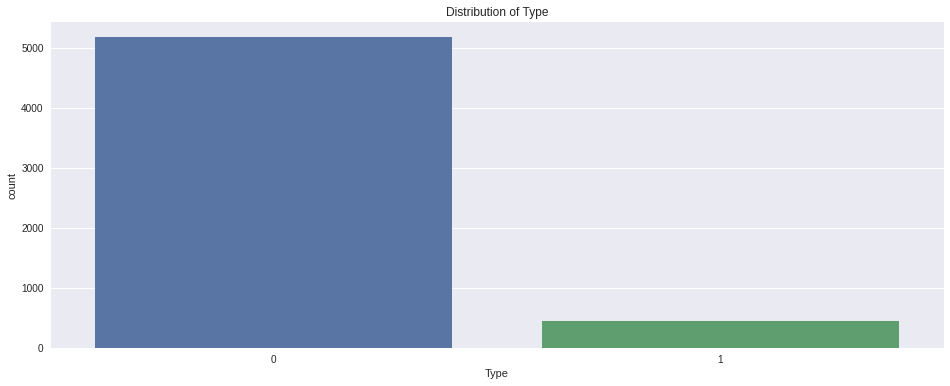

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(x="Type",data=df) #trainÏóêÏÑú Î¨¥Î£å / Ïú†Î°ú Î∂ÑÌè¨
plt.title("Distribution of Type")

Text(0.5, 1.0, 'Distribution of Type')

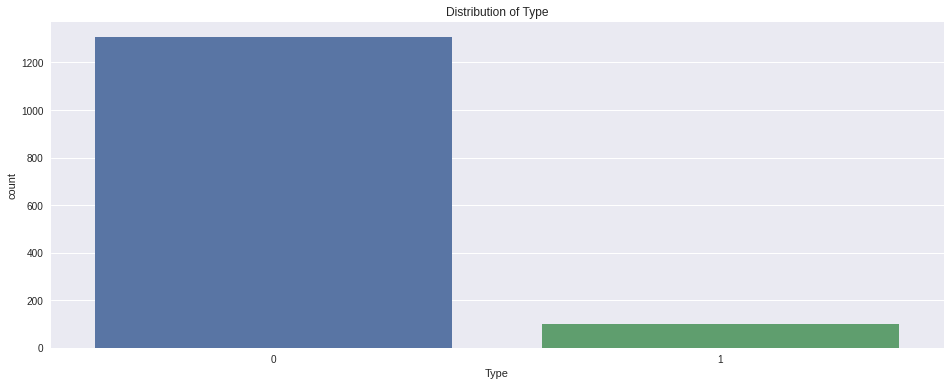

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(x="Type",data=df_test) #testÏóêÏÑú Î¨¥Î£å / Ïú†Î°ú Î∂ÑÌè¨
plt.title("Distribution of Type")

###**8.`Price`**
**: ApplicationÏùò Í∞ÄÍ≤© Ïù¥ÏÉÅÏπò Ï°¥Ïû¨ X**
*   3/4Î∂ÑÏúÑÍπåÏßÄ Í∞ÄÍ≤©Ïù¥ 0ÏõêÏù∏ Í≤ÉÏúºÎ°ú Î≥¥ÏïÑ Ïú†Î£å Ïñ¥ÌîåÏùÄ Í∑πÌûà ÏùºÎ∂ÄÏûÑ
* Ïú†Î£åÏñ¥Ìîå Ï§ëÏóêÏÑúÎèÑ 0.99Îã¨Îü¨, 2.99Îã¨Îü¨Ïù∏ Ïñ¥ÌîåÏù¥ Ï†úÏùº ÎßéÏùå
* 400Îã¨Îü¨Í∞Ä Ï†úÏùº ÎπÑÏãº Ïñ¥ÌîåÎ°ú "I'm Rich - Trump Edition", "I AM RICH PRO PLUS" Îì±ÏùÄ Ïì∏Îç∞ÏóÜÏù¥ ÎèàÏûêÎûë Ïù∏Ï¶ù Ïñ¥ÌîåÎ°ú Google Play StoreÏóê ÏûàÎäî ÏùºÏ¢ÖÏùò Î¨∏ÌôîÎùº ÏÉùÍ∞ÅÌï®	

In [ ]:
df["Price"].unique() #trainÏóêÏÑú Price Í∞í

array([  0.  ,   4.99,   6.99,   7.99,   3.99,   5.99,   2.99,   1.99,
         9.99,   0.99,   9.  ,   5.49,  10.  ,  24.99,  11.99,  79.99,
        16.99,  14.99,  29.99,  12.99,   3.49,  10.99,   7.49,   1.5 ,
        19.99,  15.99,  33.99,  39.99,   2.49,   4.49,   1.7 ,   1.49,
         3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,
         1.61,   1.59,   6.49,   1.29, 299.99, 379.99,  37.99,  18.99,
       389.99,   8.49,   1.75,  14.  ,   2.  ,   3.08,   2.59,  19.4 ,
        15.46,   8.99,   3.04,  13.99,   4.29])

In [ ]:
df["Price"].describe() #trainÏóêÏÑú Ï†ÑÏ≤¥ Í∞ÄÍ≤©Ïùò Î∂ÑÌè¨

count    5616.000000
mean        1.409918
std        20.341193
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [ ]:
df[df["Price"]>0]["Price"].describe() #trainÏóêÏÑú Ïú†Î£å Ïñ¥ÌîåÏùò Í∞ÄÍ≤© Î∂ÑÌè¨

count    441.000000
mean      17.954875
std       70.586521
min        0.990000
25%        1.990000
50%        2.990000
75%        4.990000
max      400.000000
Name: Price, dtype: float64

Text(0.5, 1.0, 'Distribution of Price of not Free Application')

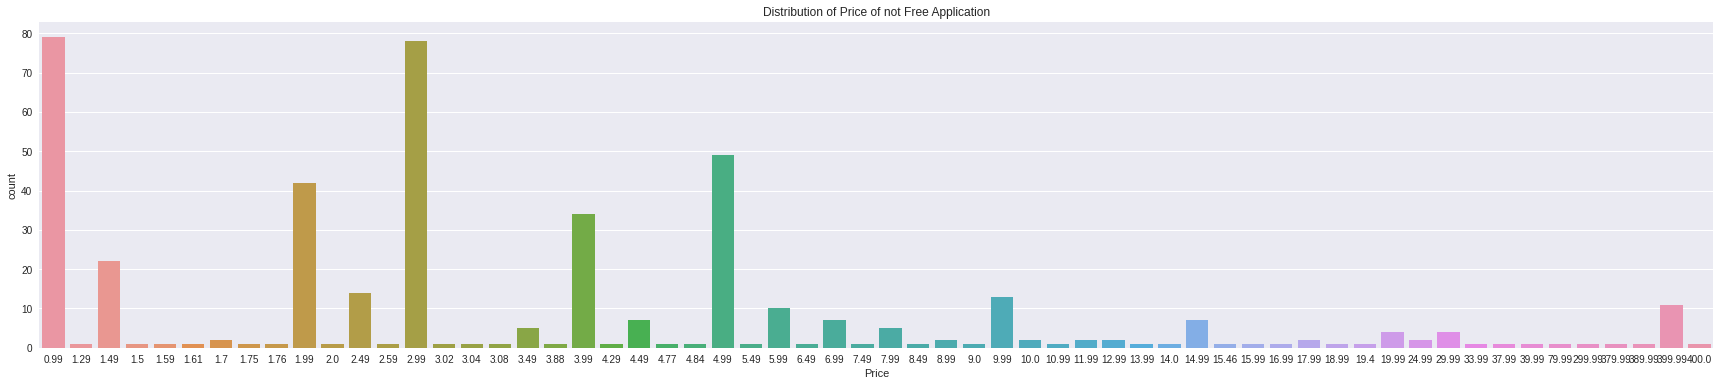

In [ ]:
plt.figure(figsize=(30,6))
sns.countplot(x="Price",data=df[df["Price"]>0])
plt.title("Distribution of Price of not Free Application")

In [ ]:
df[["App","Price"]].sort_values(by="Price",ascending=False) #trainÏóêÏÑú PriceÏùÑ Í∏∞Ï§ÄÏúºÎ°ú App ÎÇ¥Î¶º Ï∞®Ïàú Ï†ïÎ†¨

App   Price
2510               I'm Rich - Trump Edition  400.00
3253                     I AM RICH PRO PLUS  399.99
3236                      I Am Rich Premium  399.99
3244         I am rich (Most expensive app)  399.99
2506                             üíé I'm rich  399.99
...                                     ...     ...
1900                      New Launcher 2018    0.00
1899  Color Call - Caller Screen, LED Flash    0.00
1898                         ZenUI Launcher    0.00
1897            Funny Alarm Clock Ringtones    0.00
2808        Lock Screen Phone X Style OS 11    0.00

[5616 rows x 2 columns]

In [ ]:
df_test["Price"].describe() #Ï†ÑÏ≤¥ Í∞ÄÍ≤©Ïùò Î∂ÑÌè¨

count    1404.000000
mean        0.232272
std         1.141627
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        16.990000
Name: Price, dtype: float64

In [ ]:
df_test[df_test["Price"]>0]["Price"].describe() #Ïú†Î£å Ïñ¥ÌîåÏùò Í∞ÄÍ≤© Î∂ÑÌè¨

count    98.000000
mean      3.327653
std       2.905932
min       0.990000
25%       1.050000
50%       2.990000
75%       3.990000
max      16.990000
Name: Price, dtype: float64

Text(0.5, 1.0, 'Distribution of Price of not Free Application')

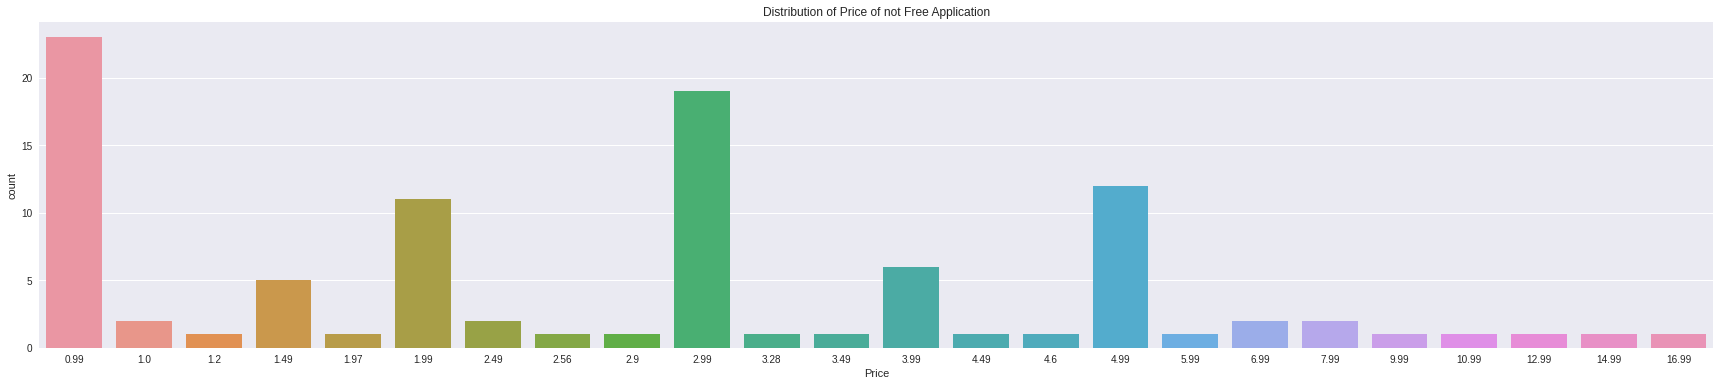

In [ ]:
plt.figure(figsize=(30,6))
sns.countplot(x="Price",data=df_test[df_test["Price"]>0])
plt.title("Distribution of Price of not Free Application")

In [ ]:
df_test[["App","Price"]].sort_values(by="Price",ascending=False) #testÏóêÏÑú PriceÏùÑ Í∏∞Ï§ÄÏúºÎ°ú App ÎÇ¥Î¶º Ï∞®Ïàú Ï†ïÎ†¨

App  Price
1365                        Trine 2: Complete Story  16.99
318                      Electrician Calculator Pro  14.99
377                            Carrier Landings Pro  12.99
310                          RPG „Éñ„É¨„Ç§„Ç∏„É≥„Ç∞ „ÇΩ„Ç¶„É´„Ç∫ „Ç¢„ÇØ„Çª„É¨„Ç§„Éà  10.99
846                             XCOM¬Æ: Enemy Within   9.99
...                                             ...    ...
485                                  Bad Piggies HD   0.00
484                   Ambulance Rescue Simulator 17   0.00
483                                      EJ Insight   0.00
482                       Super Sport Car Simulator   0.00
1403  iHoroscope - 2018 Daily Horoscope & Astrology   0.00

[1404 rows x 2 columns]

###**9.`Content Rating`** 
**: Ïù¥Ïö© Ï†ÅÏ†ï Ïó∞Î†πÏ∏µÏúºÎ°ú Ïù¥ÏÉÅÏπò Ï°¥Ïû¨ X**


*  ÎåÄÎ∂ÄÎ∂Ñ Ï†ÑÏó∞Î†πÏ∏µÏù¥ ÏÇ¨Ïö© Í∞ÄÎä•Ìïú Ïñ¥Ìîå
*   objectÌòïÏúºÎ°ú Ï∞®ÌõÑ Feature Engineering ÌïÑÏöî

In [ ]:
print("#",len(df["Content Rating"].unique()),"numbers of Content Rating class") #train data
print(df["Content Rating"].unique()) #
print(df["Content Rating"].value_counts())

# 6 numbers of Content Rating class
['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']
Everyone           4531
Teen                589
Mature 17+          281
Everyone 10+        212
Adults only 18+       2
Unrated               1
Name: Content Rating, dtype: int64


Text(0.5, 1.0, 'Distribution of Content Rating')

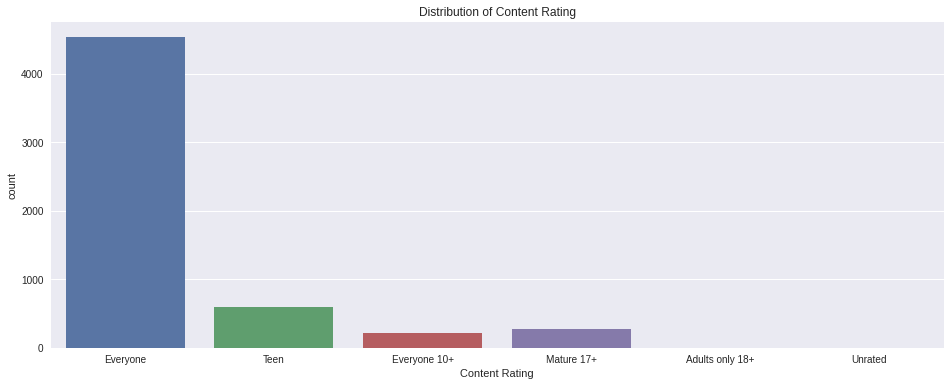

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(x="Content Rating",data=df)
plt.title("Distribution of Content Rating")

In [ ]:
print("#",len(df_test["Content Rating"].unique()),"numbers of Content Rating class") #test data
print(df_test["Content Rating"].unique()) 
print(df_test["Content Rating"].value_counts())

# 4 numbers of Content Rating class
['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+']
Everyone        1145
Teen             189
Everyone 10+      47
Mature 17+        23
Name: Content Rating, dtype: int64


Text(0.5, 1.0, 'Distribution of Content Rating')

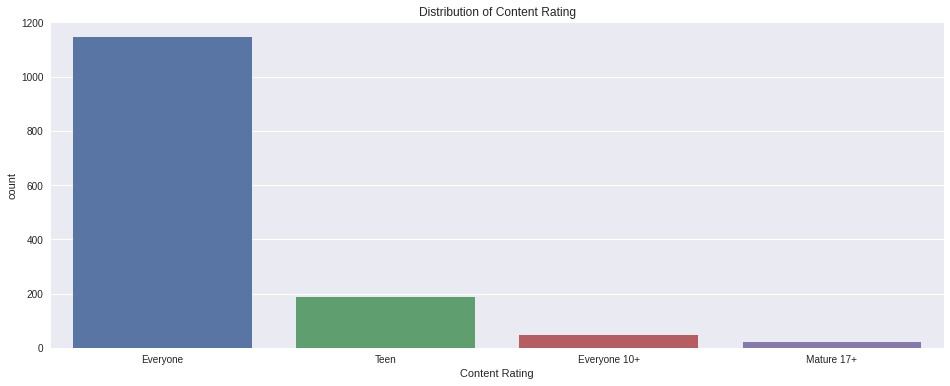

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(x="Content Rating",data=df_test)
plt.title("Distribution of Content Rating")

###**10.`Genres`** 
**: ÏÜçÌïòÎäî Ïó¨Îü¨ Í∞úÏùò Ïû•Î•¥Î°ú Ïù¥ÏÉÅÏπò Ï°¥Ïû¨ X**
*   objectÌòïÏúºÎ°ú Ï∞®ÌõÑ Feature Engineering ÌïÑÏöî


In [ ]:
print("#",len(df["Genres"].unique()),"numbers of Genres class\n") #train data
print(df["Genres"].unique()) #

# 106 numbers of Genres class

['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Auto & Vehicles' 'Beauty' 'Books & Reference' 'Business' 'Comics'
 'Comics;Creativity' 'Communication' 'Dating' 'Education'
 'Education;Creativity' 'Education;Education'
 'Education;Action & Adventure' 'Education;Pretend Play'
 'Education;Brain Games' 'Entertainment' 'Entertainment;Brain Games'
 'Entertainment;Music & Video' 'Events' 'Finance' 'Food & Drink'
 'Health & Fitness' 'House & Home' 'Libraries & Demo' 'Lifestyle'
 'Lifestyle;Pretend Play' 'Adventure;Action & Adventure' 'Arcade' 'Casual'
 'Card' 'Casual;Pretend Play' 'Strategy' 'Action' 'Puzzle' 'Sports' 'Word'
 'Racing' 'Casual;Creativity' 'Simulation' 'Adventure' 'Board' 'Trivia'
 'Role Playing' 'Simulation;Education' 'Action;Action & Adventure'
 'Casual;Brain Games' 'Simulation;Action & Adventure'
 'Educational;Creativity' 'Puzzle;Brain Games' 'Educational;Education'
 'Educational;Brain Games' 'Educational;Pretend Play'
 '

In [ ]:
df['Genres'].value_counts().sort_values()

Music & Audio;Music & Video      1
Arcade;Pretend Play              1
Art & Design;Pretend Play        1
Adventure;Education              1
Adventure;Brain Games            1
                              ... 
Personalization                227
Medical                        253
Education                      309
Entertainment                  337
Tools                          463
Name: Genres, Length: 106, dtype: int64

In [ ]:
print("#",len(df_test["Genres"].unique()),"numbers of Genres class\n") #test data
print(df_test["Genres"].unique()) #

# 73 numbers of Genres class

['Productivity' 'Entertainment' 'Racing' 'Health & Fitness'
 'Books & Reference;Education' 'Tools' 'Education;Pretend Play'
 'Educational;Pretend Play' 'Role Playing;Pretend Play'
 'Books & Reference' 'Puzzle' 'Board' 'Education' 'Action' 'Arcade'
 'Casual' 'Weather' 'Photography' 'Maps & Navigation' 'Sports' 'Finance'
 'Role Playing' 'Business' 'Simulation' 'Strategy' 'Communication'
 'Auto & Vehicles' 'Shopping' 'Lifestyle' 'Art & Design' 'Personalization'
 'News & Magazines' 'Video Players & Editors' 'House & Home'
 'Travel & Local' 'Social' 'Educational;Education' 'Events'
 'Simulation;Education' 'Medical' 'Educational;Action & Adventure'
 'Adventure' 'Sports;Action & Adventure' 'Card' 'Word' 'Beauty'
 'Education;Education' 'Parenting' 'Education;Action & Adventure' 'Trivia'
 'Board;Brain Games' 'Entertainment;Music & Video' 'Educational'
 'Educational;Creativity' 'Entertainment;Action & Adventure'
 'Music;Music & Video' 'Casual;Pretend Play' 'Food & D

In [ ]:
df_test['Genres'].value_counts().sort_values()

Educational;Brain Games               1
Parenting                             1
Entertainment;Action & Adventure      1
Role Playing;Brain Games              1
Casual;Brain Games                    1
                                   ... 
Simulation                           66
Sports                               78
Entertainment                        80
Education                            82
Tools                               162
Name: Genres, Length: 73, dtype: int64

###**11.`Last Updated`** 
**: Í∞ÄÏû• ÏµúÍ∑ºÏóê ÏóÖÎç∞Ïù¥Ìä∏Îêú ÎÇ†ÏßúÎ°ú Ïù¥ÏÉÅÏπò Ï°¥Ïû¨ X**
*   objectÌòïÏúºÎ°ú Ï∞®ÌõÑ Feature Engineering ÌïÑÏöî

In [ ]:
df["Last Updated"].value_counts() #train data

2018-08-03    162
2018-07-31    127
2018-08-01    125
2018-08-02    125
2018-07-30     91
             ... 
2016-07-27      1
2014-10-18      1
2013-09-23      1
2017-03-24      1
2013-08-31      1
Name: Last Updated, Length: 1132, dtype: int64

In [ ]:
df_test["Last Updated"].value_counts() #test data

2018-08-07    20
2018-08-01    19
2018-08-02    18
2018-07-26    15
2018-08-06    14
              ..
2017-09-30     1
2017-04-29     1
2016-10-31     1
2017-07-10     1
2017-03-03     1
Name: Last Updated, Length: 678, dtype: int64

###**12.`Id`** 
**: Ï†úÌíàÏùò Î≤àÌò∏Î°ú Ïù¥ÏÉÅÏπò Ï°¥Ïû¨ X**

In [ ]:
print(len(df["Id"].unique()),"number of Id") #train data

5616 number of Id


In [ ]:
print(len(df_test["Id"].unique()),"number of Id") #test data

1404 number of Id


#**Feature / Target Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏ ÏÉùÏÑ±**

In [ ]:
y=df["Rating"] #Target data - Ïñ¥ÌîåÏùò RatingÏùÑ ÏòàÏ∏°ÌïòÎäî Î¨∏Ï†ú
x=df.drop("Rating",axis=1,inplace=False) #Feature data

#**Feature Engineering**

trainÍ≥º testÏóêÏÑúÏùò Î≤îÏ£ºÌòï Î≥ÄÏàòÏùò class labelÏùò Í∞ØÏàòÏôÄ Ï¢ÖÎ•òÍ∞Ä ÏÑúÎ°ú Îã¨Îùº<br> Í∞ÅÍ∞Å Îî∞Î°ú scalingÍ≥º encodingÌïòÎäî Í≤ΩÏö∞ dataÏùò Í∞ôÏùÄ classÎ•º ÌëúÌòÑÌïòÎäî label Í∞íÏù¥ Îã¨ÎùºÏßà Ïàò ÏûàÏñ¥<br> Ìï©Ï≥êÏÑú Ìïú Î≤àÏóê feature engineeringÍ≥º encodingÏùÑ ÏßÑÌñâ 

In [ ]:
X=pd.concat([x, df_test], axis=0, sort=False) #trainÍ≥º test Ìï©ÏπòÍ∏∞

##**1.Î∂àÌïÑÏöîÌïú Feature ÏÇ≠Ï†ú : `App`, `Type`**

* `App`Îäî Í∞Å rowÏùò Ìï¥ÎãπÌïòÎäî Ïñ¥ÌîåÏù¥ Ï§ëÎ≥µÎê®Ïù¥ ÏóÜÍ≥† Í∞ÅÍ∞Å Í≥†Ïú†Ìïú Í≤ÉÏúºÎ°ú ÌôïÏù∏Îê®Ïóê Îî∞Îùº ÏÇ≠Ï†ú
* `Price`Ïùò Î™ÖÏãúÎêú Íµ¨Ï≤¥Ï†ÅÏù∏ Í∞ÄÍ≤©ÏúºÎ°ú Î¨¥Î£å/Ïú†Î£åÏùò Ïó¨Î∂ÄÎ•º ÌåêÎã®Ìï† Ïàò ÏûàÏñ¥ `Type` ÏÇ≠Ï†ú

In [ ]:
X.drop(labels = ['App',"Type"], axis = 1, inplace = True)

##**2.`Last Updated` -> `Updated`**
* Ï∂úÏãúÎêú Ïù¥ÌõÑÎ°ú ÏßÄÏÜçÏ†ÅÏù∏ Ïñ¥ÌîåÏùò ÏóÖÎç∞Ïù¥Ìä∏Îäî<br> Ïñ¥ÌîåÏùÑ ÏÇ¨Ïö©ÌïòÍ≥† ÌèâÍ∞ÄÏóê ÌÅ∞ ÏòÅÌñ•ÏùÑ ÎØ∏Ïπ®<br> => ÏóÖÎç∞Ïù¥Ìä∏Îêú ÌäπÏ†ï ÎÇ†Ïßú ÎåÄÏã† ÏóÖÎç∞Ïù¥Ìä∏Í∞Ä Îêú Í∏∞Í∞ÑÏúºÎ°ú Î≥ÄÍ≤Ω

In [ ]:
X['Updated'] = (pd.to_datetime(df['Last Updated']) - pd.to_datetime('2010-05-21')).dt.days.astype(np.float32)
X.drop('Last Updated', axis=1,inplace=True)

##**3. `Gentres` Ï≤òÎ¶¨**


*   ; Î•º Í∏∞Ï§ÄÏúºÎ°ú ÎèôÏãúÏóê Ïó¨Îü¨Í∞ú Î∂ÑÎ•ò Ìïú Î≤àÏóê ÌëúÏãúÌïú Í≤ÉÏùÑ ÎÇòÎà†ÏÑú Îî∞Î°ú class Ï§å

In [ ]:

Genre_1 = X.Genres.apply(lambda x:x.split(';')[0])
X['Genre_1']=Genre_1

Genre_2= X.Genres.apply(lambda x:x.split(';')[-1])
X['Genre_2']=Genre_2

X.drop("Genres",axis=1,inplace=True)

##**4. Feature Engineering ÌõÑ Î≥ÄÏàò Íµ¨Î∂Ñ**




|Î≥ÄÏàò Ï¢ÖÎ•ò|Feature Î™Ö|
|------|---|
|discrete variable|`Category`,`Content Rating`,`Genre_1`,`Genre_1`|
|target variable|`Rating`|
|continuous variavle|`Reviews`, `Size`, `Installs`, `Price`,`Undated`|


In [ ]:
dis_var=["Category","Content Rating","Genre_1","Genre_2"]
target="Rating"
con_var=["Reviews","Size","Installs","Price","Updated"]

##**5.Label Encoding**

* ÌöåÍ∑Ä Ìä∏Î¶¨ Î™®Îç∏Ïùò Í≤ΩÏö∞ Label EncodingÎêú Îç∞Ïù¥ÌÑ∞ Ïù¥Ïö©

In [ ]:
Le=LabelEncoder() 
for feature in dis_var:
  Le.fit(X[feature])
  X[feature] = Le.transform(X[feature])

##**6. RobustScaler**



*   ÏïÑÏõÉÎùºÏù¥Ïñ¥Ïùò ÏòÅÌñ•ÏùÑ ÏµúÏÜåÌôîÌïú Í∏∞Î≤ï
* Ï§ëÏïôÍ∞í(median)Í≥º IQR(interquartile range) Ïù¥Ïö©<br>-> StandardScaler ÎπÑÍµê: ÌëúÏ§ÄÌôî ÌõÑ ÎèôÏùºÌïú Í∞íÏùÑ Îçî ÎÑìÍ≤å Î∂ÑÌè¨ÏãúÌÇ¥
* IQR = Q3 - Q1 : 25%Í≥º 75%Ïùò Í∞í Îã§Î£∏




In [ ]:
X_rs=pd.DataFrame.copy(X) 
rs = RobustScaler()
rs.fit(X[con_var])
X_rs[con_var]= rs.transform(X_rs[con_var])

##**7. One-hot Encoding**
* ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏Ïóê ÏÇ¨Ïö©

In [ ]:
X_ohe=pd.get_dummies(X_rs, columns=dis_var)

##**8. ÏõêÎûò Train / Test Îç∞Ïù¥ÌÑ∞Î°ú Î∂ÑÎ¶¨**

In [ ]:
df_train=X_rs.iloc[:5616,:] #label encodingÎêú train data
df_train.shape

(5616, 10)

In [ ]:
df_ohe_train=X_ohe.iloc[:5616,:] #One Hot encodingÎêú train data
df_ohe_train.head()

Reviews      Size   Installs  ...  Genre_2_49  Genre_2_50  Genre_2_51
0 -0.052308  0.229885  -0.090909  ...           0           0           0
1 -0.021825  0.038314   0.404040  ...           0           0           0
2  3.243148 -0.164751   4.949495  ...           0           0           0
3  8.077207  0.459770  50.404040  ...           0           0           0
4 -0.021825 -0.390805   0.000000  ...           0           0           0

[5 rows x 145 columns]

In [ ]:
df_test=X_rs.iloc[5616:,:] #label encodingÎêú test data
df_test.shape

(1404, 10)

In [ ]:
df_ohe_test=X_ohe.iloc[5616:,:] #One Hot encodingÎêú test data
df_ohe_test.head()

Reviews      Size  Installs  ...  Genre_2_49  Genre_2_50  Genre_2_51
0 -0.012846 -0.333333  0.000000  ...           0           0           0
1 -0.048233 -0.440613 -0.090909  ...           0           0           0
2 -0.051402  2.107280 -0.090909  ...           0           0           0
3 -0.055439 -0.452107 -0.100000  ...           0           0           0
4 -0.042122 -0.038314 -0.090909  ...           0           0           0

[5 rows x 145 columns]

##**9. Train data => Train / Test Î∂ÑÎ¶¨**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(df_train,y,test_size=0.2,random_state=0) #label encodingÎêú train/test data

In [ ]:
X_ohe_train,X_ohe_test,y_train,y_test=train_test_split(df_ohe_train,y,test_size=0.2,random_state=0) #One Hot encodingÎêú train/test data

# **RMES : ÌèâÍ∞Ä ÏßÄÌëú Ìï®Ïàò**

In [ ]:
def rmse(y,pred):
    return np.sqrt(np.mean((y-pred)**2))

# **ÌöåÍ∑Ä Ìä∏Î¶¨ Î™®Îç∏ ÌïôÏäµ/ÌèâÍ∞Ä**

##**1-1. XGBoost**

: GridSearchCVÎ°ú hyper-parameter tunning

In [ ]:
xgb_reg=XGBRegressor()
xgb_params = {
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],

              'colsample_bytree': [0.7],
              'n_estimators': [500]}
xgb_grid = GridSearchCV(xgb_reg,
                        xgb_params,
                        cv = 5,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  45 out of  45 | elapsed:  1.0min finished


[20:12:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                     

In [ ]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

pred=xgb_grid.predict(X_train)
print('train RMSE : {0:.4f}'.format(rmse(y_train,pred)))

0.1629349004110537
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 500, 'objective': 'reg:linear'}
train RMSE : 0.3241


In [ ]:
xgb_best = XGBRegressor(colsample_bytree= 0.7, learning_rate= 0.03, max_depth= 6, 
                        min_child_weight=4, n_estimators= 500,  
                        objective='reg:linear')
xgb_best.fit(X_train, y_train)
pred=xgb_best.predict(X_test)
print('test RMSE : {0:.4f}'.format(rmse(y_test,pred)))

[20:12:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
test RMSE : 0.5202


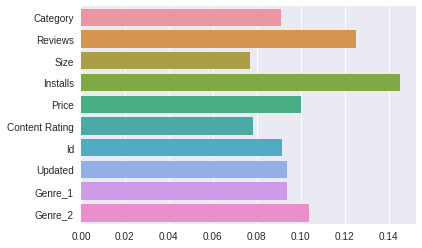

In [ ]:
sns.barplot(x=xgb_best.feature_importances_,y=X_train.columns) #Feature Î≥Ñ Ï§ëÏöîÎèÑ ÎèÑÏãùÌôî

##**1-2. XGBoost**
: default Í∞í<br>
https://xgboost.readthedocs.io/en/latest/parameter.html

In [ ]:
xgb_best_1 = XGBRegressor()
xgb_best_1.fit(X_train, y_train)
pred=xgb_best_1.predict(X_train)
print('train RMSE : {0:.4f}'.format(rmse(y_train,pred)))
pred=xgb_best_1.predict(X_test)
print('test RMSE : {0:.4f}'.format(rmse(y_test,pred)))

[20:12:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
train RMSE : 0.4533
test RMSE : 0.5208


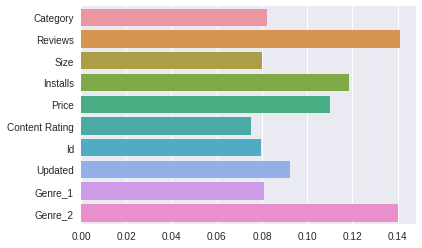

In [ ]:
sns.barplot(x=xgb_best_1.feature_importances_,y=X_train.columns) #Feature Î≥Ñ Ï§ëÏöîÎèÑ ÎèÑÏãùÌôî

##**2-1. LightGBM**
: GridSearchCVÎ°ú hyper-parameter tunning

In [ ]:
lgb_params = {
    'num_leave' : [1,3],
    'learning_rate' : [0.03,0.05,0.07],
    'n_estimators':[500,1000],
    'max_bin' : [80],
    'gpu_id':[0] ,         
    'tree_method':['gpu_hist'],
    'predictor':['gpu_predictor'],
    'refit':[True]
}

lgb_reg = LGBMRegressor()
lgb_grid = GridSearchCV(lgb_reg,
                        lgb_params,
                        cv = 5,
                        n_jobs = -1,
                        verbose=True)


lgb_grid.fit(X_train,y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   35.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=None,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'gpu_id': [0], 'learning_rate': [0.03, 0.05, 0.07],
                         'max_bin': [80], 'n_estimators': [500, 1000],
                         'num_leav

In [ ]:
print(lgb_grid.best_score_)
print(lgb_grid.best_params_)

pred=xgb_grid.predict(X_train)
print('train RMSE : {0:4f}'.format(rmse(y_train,pred)))

0.14598077936775916
{'gpu_id': 0, 'learning_rate': 0.03, 'max_bin': 80, 'n_estimators': 500, 'num_leave': 1, 'predictor': 'gpu_predictor', 'refit': True, 'tree_method': 'gpu_hist'}
train RMSE : 0.324136


In [ ]:
lgb_best = LGBMRegressor(gpu_id= 0, learning_rate=0.03, 
                         max_bin=80, n_estimators= 500, 
                         num_leave=1, predictor='gpu_predictor', 
                         refit=True, tree_method= 'gpu_hist' )
lgb_best.fit(X_train,y_train)
pred=lgb_best.predict(X_test)
print('test RMSE : {0:4f}'.format(rmse(y_test,pred)))

test RMSE : 0.535216


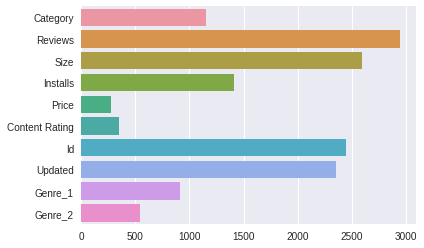

In [ ]:
sns.barplot(x=lgb_best.feature_importances_,y=X_train.columns)  #Feature Î≥Ñ Ï§ëÏöîÎèÑ ÎèÑÏãùÌôî

##**2-2. LightGBM**
: default Í∞í<br>
https://lightgbm.readthedocs.io/en/latest/Parameters.html


In [ ]:
lgb_best_1 = LGBMRegressor( )
lgb_best_1.fit(X_train,y_train)
pred=lgb_best_1.predict(X_test)
print('test RMSE : {0:4f}'.format(rmse(y_test,pred)))

test RMSE : 0.527655


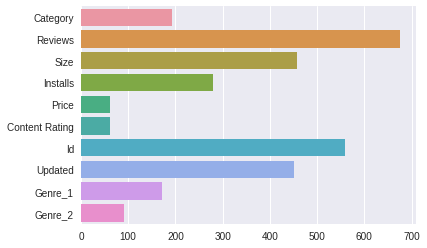

In [ ]:
sns.barplot(x=lgb_best_1.feature_importances_,y=X_train.columns)  #Feature Î≥Ñ Ï§ëÏöîÎèÑ ÎèÑÏãùÌôî

##**3-1. CatBoost**
: GridSearchCVÎ°ú hyper-parameter tunning

In [ ]:
cat=CatBoostRegressor()
parameters = {'depth'         : [4,6,8,10],
                  'learning_rate' : [0.01, 0.03, 0.05, 0.1, 0.15],
                  'iterations'    : [20, 30, 50, 80, 100]
                 }
cat_grid = GridSearchCV(estimator=cat, param_grid = parameters, cv = 5, n_jobs=-1)

cat_grid.fit(X_train, y_train)


0:	learn: 0.5306077	total: 50.5ms	remaining: 5s
1:	learn: 0.5247313	total: 53ms	remaining: 2.6s
2:	learn: 0.5203716	total: 55.4ms	remaining: 1.79s
3:	learn: 0.5161139	total: 57.9ms	remaining: 1.39s
4:	learn: 0.5127364	total: 60.4ms	remaining: 1.15s
5:	learn: 0.5103514	total: 62.7ms	remaining: 982ms
6:	learn: 0.5074989	total: 65.1ms	remaining: 865ms
7:	learn: 0.5052320	total: 67.5ms	remaining: 776ms
8:	learn: 0.5030772	total: 69.9ms	remaining: 707ms
9:	learn: 0.5009604	total: 72.1ms	remaining: 649ms
10:	learn: 0.4994368	total: 74.3ms	remaining: 602ms
11:	learn: 0.4977347	total: 76.6ms	remaining: 562ms
12:	learn: 0.4958913	total: 79ms	remaining: 528ms
13:	learn: 0.4936091	total: 81.1ms	remaining: 498ms
14:	learn: 0.4924978	total: 83.4ms	remaining: 473ms
15:	learn: 0.4911119	total: 85.6ms	remaining: 450ms
16:	learn: 0.4899851	total: 88ms	remaining: 430ms
17:	learn: 0.4891731	total: 90.3ms	remaining: 411ms
18:	learn: 0.4880686	total: 92.5ms	remaining: 394ms
19:	learn: 0.4871228	total: 94.8

GridSearchCV(cv=5, error_score=nan,
             estimator=<catboost.core.CatBoostRegressor object at 0x7f7ef46bae10>,
             iid='deprecated', n_jobs=-1,
             param_grid={'depth': [4, 6, 8, 10],
                         'iterations': [20, 30, 50, 80, 100],
                         'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print(cat_grid.best_score_)
print(cat_grid.best_params_)
pred=cat_grid.predict(X_train)
print('train RMSE : {0:.4f}'.format(rmse(y_train,pred)))

0.164573438265261
{'depth': 6, 'iterations': 100, 'learning_rate': 0.15}
train RMSE : 0.4170


In [ ]:
cat_best = CatBoostRegressor(depth = 6, iterations=100, learning_rate=0.15)
cat_best.fit(X_train, y_train)
pred=cat_best.predict(X_test)
print('test RMSE : {0:.4f}'.format(rmse(y_test,pred)))

0:	learn: 0.5306077	total: 2.97ms	remaining: 294ms
1:	learn: 0.5247313	total: 5.39ms	remaining: 264ms
2:	learn: 0.5203716	total: 7.69ms	remaining: 249ms
3:	learn: 0.5161139	total: 10.1ms	remaining: 242ms
4:	learn: 0.5127364	total: 12.3ms	remaining: 234ms
5:	learn: 0.5103514	total: 14.6ms	remaining: 229ms
6:	learn: 0.5074989	total: 17.2ms	remaining: 228ms
7:	learn: 0.5052320	total: 19.7ms	remaining: 226ms
8:	learn: 0.5030772	total: 23.8ms	remaining: 240ms
9:	learn: 0.5009604	total: 26.3ms	remaining: 236ms
10:	learn: 0.4994368	total: 28.6ms	remaining: 231ms
11:	learn: 0.4977347	total: 31ms	remaining: 227ms
12:	learn: 0.4958913	total: 33.3ms	remaining: 223ms
13:	learn: 0.4936091	total: 35.6ms	remaining: 219ms
14:	learn: 0.4924978	total: 37.9ms	remaining: 215ms
15:	learn: 0.4911119	total: 40.3ms	remaining: 211ms
16:	learn: 0.4899851	total: 42.8ms	remaining: 209ms
17:	learn: 0.4891731	total: 45.1ms	remaining: 205ms
18:	learn: 0.4880686	total: 47.4ms	remaining: 202ms
19:	learn: 0.4871228	tot

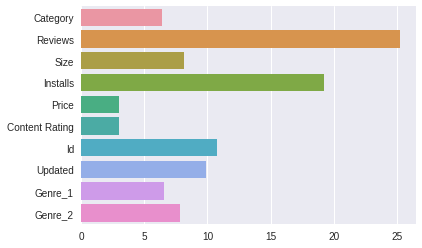

In [ ]:
sns.barplot(x=cat_best.feature_importances_,y=X_train.columns)  #Feature Î≥Ñ Ï§ëÏöîÎèÑ ÎèÑÏãùÌôî

##**3-2. CatBoost**
: default<br>
https://catboost.ai/docs/concepts/python-reference_catboostregressor.html


In [ ]:
cat_best_1 = CatBoostRegressor()
cat_best_1.fit(X_train, y_train)
pred=cat_best_1.predict(X_test)
print('test RMSE : {0:.4f}'.format(rmse(y_test,pred)))

Learning rate set to 0.050996
0:	learn: 0.5355449	total: 4.77ms	remaining: 4.76s
1:	learn: 0.5331207	total: 7.35ms	remaining: 3.67s
2:	learn: 0.5306607	total: 9.86ms	remaining: 3.28s
3:	learn: 0.5285766	total: 12.6ms	remaining: 3.13s
4:	learn: 0.5266207	total: 15ms	remaining: 2.98s
5:	learn: 0.5249438	total: 17.4ms	remaining: 2.88s
6:	learn: 0.5232018	total: 19.9ms	remaining: 2.82s
7:	learn: 0.5215353	total: 22.3ms	remaining: 2.76s
8:	learn: 0.5203062	total: 24.7ms	remaining: 2.72s
9:	learn: 0.5188969	total: 27ms	remaining: 2.68s
10:	learn: 0.5177131	total: 30.2ms	remaining: 2.71s
11:	learn: 0.5165046	total: 32.5ms	remaining: 2.67s
12:	learn: 0.5152005	total: 35.1ms	remaining: 2.67s
13:	learn: 0.5141939	total: 37.4ms	remaining: 2.64s
14:	learn: 0.5131930	total: 40ms	remaining: 2.62s
15:	learn: 0.5119888	total: 42.3ms	remaining: 2.6s
16:	learn: 0.5110214	total: 44.7ms	remaining: 2.59s
17:	learn: 0.5102701	total: 47.2ms	remaining: 2.57s
18:	learn: 0.5096341	total: 49.6ms	remaining: 2.56s

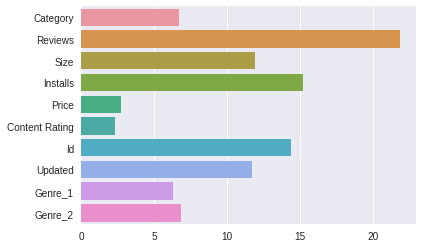

In [ ]:
sns.barplot(x=cat_best_1.feature_importances_,y=X_train.columns)  #Feature Î≥Ñ Ï§ëÏöîÎèÑ ÎèÑÏãùÌôî

#**ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏ ÌïôÏäµ/ÌèâÍ∞Ä/ÏòàÏ∏°**

##**1-1. ElasticNet Linear Regression**

In [ ]:
en=ElasticNet()
en_alphas={"alpha":[0.0001,0.01,0.1,0.5,1,5,10]}

en_grid = GridSearchCV(en, en_alphas, scoring='neg_mean_squared_error',cv=5)
en_grid.fit(X_ohe_train,y_train)
pred=en_grid.predict(X_ohe_train)


In [ ]:
print(en_grid.best_params_)
print(en_grid.best_score_)
print('train RMSE : {0:4f}'.format(rmse(y_train,pred)))

{'alpha': 0.0001}
-0.27505575457272485
train RMSE : 0.516003


In [ ]:
en_best = ElasticNet(alpha=0.0001)
en_best.fit(X_ohe_train,y_train)
pred=en_best.predict(X_ohe_test)
print('test RMSE : {0:4f}'.format(rmse(y_test,pred)))

test RMSE : 0.547697


##**2-1. Linear Support Vector Machine**

In [ ]:
svr = svm.SVR()
params = {
         'C' : [2,5,10],'epsilon':[0.3,0.5]
      }
svr_grid = GridSearchCV(svr, params, scoring='neg_mean_squared_error',cv=5)
svr_grid.fit(X_ohe_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [2, 5, 10], 'epsilon': [0.3, 0.5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
pred=svr_grid.predict(X_ohe_train)
print(svr_grid.best_params_)
print(svr_grid.best_score_)
print('train RMSE : {0:4f}'.format(rmse(y_train,pred)))

{'C': 10, 'epsilon': 0.5}
-0.2857953002602332
train RMSE : 0.533447


In [ ]:
svr_best = svm.SVR(C=10,epsilon=0.5)
svr_best.fit(X_ohe_train,y_train)
pred=svr_best.predict(X_ohe_test)
print('test RMSE: {0:4f}'.format(rmse(y_test,pred)))

test RMSE: 0.557795


##**3-1. Linear Regression**

In [ ]:
lr_best = LinearRegression()
lr_best.fit(X_ohe_train,y_train)
pred=lr_best.predict(X_ohe_train)
print('train RMSE : {0:4f}'.format(rmse(y_train,pred)))
pred=lr_best.predict(X_ohe_test)
print('train RMSE : {0:4f}'.format(rmse(y_test,pred)))

train RMSE : 0.515730
train RMSE : 0.548184


##**4-1. Random Forest Regressor**

In [ ]:
rand_params = [
    {'n_estimators': [200, 300, 400],
     'max_features': [5, 8],
     'min_samples_leaf':[1],
     'min_samples_split':[2]},  
    {'bootstrap': [False], # ÎπÑÎ≥µÏõêÏ∂îÏ∂ú
     'n_estimators': [150, 200, 250],
     'max_features': [5, 8],
     'min_samples_leaf':[1],
     'min_samples_split':[2]}
  ]

rf_reg = RandomForestRegressor(random_state=0)
rf_grid = GridSearchCV(rf_reg,
                           rand_params,
                           cv = 5,
                           n_jobs=4,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,
                           verbose=2)
rf_grid.fit(X_ohe_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:  2.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, rand...
             iid='deprecated', n_jobs=4,
             param_grid=[{'max_features': [5, 8], 'min_samples_leaf': [1],
     

In [ ]:
print(rf_grid.best_score_)
print(rf_grid.best_params_)
pred=rf_grid.predict(X_ohe_train)
print('train RMSE : {0:4f}'.format(rmse(y_train,pred)))

-0.2433267261922943
{'max_features': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
train RMSE : 0.181381


In [ ]:
rf_best = RandomForestRegressor(max_features=8, min_samples_leaf=1, min_samples_split= 2, n_estimators=400)
rf_best.fit(X_ohe_train,y_train)

pred=rf_best.predict(X_ohe_test)
print('test RMSE : {0:4f}'.format(rmse(y_test,pred)))

test RMSE : 0.530133


#**Ïä§ÌÉù ÏïåÏÉÅÎ∏î Î™®Îç∏**

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold

def stack(model, X_train, y_train, X_test, n_folds=5):
    kfold = KFold(n_splits = n_folds, random_state = 0)
    
    # ÏµúÏ¢Ö Î™®Îç∏ÏóêÏÑú ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞ ÏÖã ÏÖãÌåÖ(0 Í∞íÏúºÎ°ú)
    # Îç∞Ïù¥ÌÑ∞ shapeÏù¥ (100, col) Ïù¥Î©¥ Ìè¥ÎìúÏùò Í≤ÄÏ¶ù Í≥ºÏ†ïÏóêÏÑú Ï†ÄÏû•Ìï† Îç∞Ïù¥ÌÑ∞Ïùò shapeÎäî (100, 1) ÏûÖÎãàÎã§. 
    # (Í≤∞Íµ≠ validation Îç∞Ïù¥ÌÑ∞Î°ú ÏòàÏ∏°Ìïú predicted val_y Í∞íÏùò columnÏùÄ 1Í∞úÎãàÍπå !!)
    train_fold_predict = np.zeros((X_train.shape[0], 1))
    # testÎäî X_test Í∞íÏùÑ Ïù¥Ïö©Ìï¥ÏÑú Îß§ Ìè¥ÎìúÎßàÎã§ ÏòàÏ∏°ÏùÑ ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê (100, foldÍ∞úÏàò) ÎßåÌÅºÏùò shapeÎ•º Í∞ñÍ≤å Îê©ÎãàÎã§.(Ï∂îÌõÑ ÌèâÍ∑†ÎÇ¥ÏÑú (100,1) ÏÇ¨Ïù¥Ï¶àÎ°ú ÎßåÎì§Í≤É)
    # Í∑∏ÎûòÏÑú Ìï¥Îãπ Ìè¥ÎìúÎßàÎã§ X_testÏùò ÏòàÏ∏° Í∞íÏùÑ Ìï¥Îãπ foldÏóê Ìï¥ÎãπÎêòÎäî Ïó¥Ïóê ÎÑ£ÏäµÎãàÎã§.
    test_predict = np.zeros((X_test.shape[0], n_folds))
    print("model : ", model.__class__.__name__)
    
    for cnt, (train_index, valid_index) in enumerate(kfold.split(X_train)):
        #foldÎ≥ÑÎ°ú Îç∞Ïù¥ÌÑ∞ splitÌïòÎäî Î∂ÄÎ∂Ñ
        X_train_ = X_train[train_index]
        y_train_ = y_train[train_index]
        X_validation = X_train[valid_index]
        
        #Ìï¥Îãπ fold ÌïôÏäµ
        model.fit(X_train_, y_train_)
        
        #Ìï¥Îãπ foldÏóêÏÑú ÌïôÏäµÎêú Î™®Îç∏ÏóêÎã§Í∞Ä Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞(X_validation)Î°ú ÏòàÏ∏° ÌõÑ Ï†ÄÏû•
        #validationÏóê Ìï¥ÎãπÌïòÎäî Ïù∏Îç±Ïä§Í∞Ä Ï†ÑÏ≤¥Ïùò 1/foldÏàò Ïù¥ÎØÄÎ°ú Ìï¥Îãπ foldÏùò validation Îç∞Ïù¥ÌÑ∞Ïóê Ìï¥ÎãπÌïòÎäî Î∂ÄÎ∂Ñ
        train_fold_predict[valid_index, :] = model.predict(X_validation).reshape(-1, 1) 
        
        #Ìï¥Îãπ foldÏóêÏÑú ÏÉùÏÑ±Îêú Î™®Îç∏ÏóêÍ≤å ÏõêÎ≥∏ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞(X_test)Î•º Ïù¥Ïö©Ìï¥ÏÑú ÏòàÏ∏°ÏùÑ ÏàòÌñâÌïòÍ≥† Ï†ÄÏû•(Ï∂îÌõÑ Î™®Îç∏Î≥ÑÎ°ú Ìï©Ï≥êÏÑú new_test Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±)
        test_predict[:, cnt] = model.predict(X_test)
    
    #forÎ¨∏Ïù¥ ÎÅùÎÇòÎ©¥ test_predÎäî ÌèâÍ∑†ÏùÑ ÎÇ¥ÏÑú ÌïòÎÇòÎ°ú Ìï©ÏπúÎã§.
    test_predict_mean = np.mean(test_predict, axis =1).reshape(-1, 1)
    
    return train_fold_predict, test_predict_mean

##**Ïä§ÌÉù ÏïåÏÉÅÎ∏î [1]**

In [ ]:
X_train_np=X_train.values
X_test_np=X_test.values

X_ohe_train_np=X_ohe_train.values
X_ohe_test_np=X_ohe_test.values
y_train_np=y_train.values

In [ ]:
xgb_train_1, xgb_test_1 = stack(xgb_best_1, X_train_np, y_train_np, X_test_np) #ÌöåÍ∑Ä Ìä∏Î¶¨ÏóêÏÑú ÏÑ±Îä•Ïù¥ Ï°∏ÏùÄ 3Í∞ÄÏßÄ Î™®Îç∏
lgb_train_1, lgb_test_1 = stack(lgb_best_1, X_train_np, y_train_np, X_test_np)
cat_train_1, cat_test_1 = stack(cat_best, X_train_np, y_train_np, X_test_np)
rf_train_1, rf_test_1 = stack(rf_best, X_train_np, y_train_np, X_test_np) #ÏÑ†Ìòï ÌöåÍ∑ÄÏóêÏÑú ÏÑ±ÎäòÏù¥ Ï¢ãÏùÄ 2Í∞ÄÏßÄ Î™®Îç∏
lr_train_1, lr_test_1 = stack(lr_best, X_ohe_train_np, y_train_np, X_ohe_test_np)

stack_final_X_train=np.concatenate((xgb_train_1,lgb_train_1,cat_train_1,rf_train_1,lr_train_1),axis=1)
stack_final_X_test=np.concatenate((xgb_test_1,lgb_test_1,cat_test_1,rf_test_1,lr_test_1),axis=1)

meta_model_lasso=Lasso(alpha=0.0005) #FeatureÍ∞Ä ÎßéÍ∏∞ ÎïåÎ¨∏Ïóê Î∂àÌïÑÏöîÌïú ÌöåÍ∑Ä Í≥ÑÏàòÎ•º Í∞êÏÜåÏãúÏºú 0ÏúºÎ°ú ÎßåÎì§Í±∞ Ï†úÍ±∞ -> Ï†ÅÏ†àÌïú FeatureÎßå ÌöåÍ∑ÄÏóê Ìè¨Ìï®ÏãúÌÇ¥

meta_model_lasso.fit(stack_final_X_train,y_train)
final_pred=meta_model_lasso.predict(stack_final_X_test)
print('train RMSE : {0:4f}'.format(rmse(y_test,final_pred)))

model :  XGBRegressor
[20:19:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:19:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:19:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:19:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:19:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
model :  LGBMRegressor
model :  CatBoostRegressor
0:	learn: 0.5325536	total: 2.86ms	remaining: 283ms
1:	learn: 0.5266122	total: 5.12ms	remaining: 251ms
2:	learn: 0.5219739	total: 7.25ms	remaining: 234ms
3:	learn: 0.5182905	total: 9.38ms	remaining: 225ms
4:	learn: 0.5147326	total: 11.4ms	remaining: 217ms
5:	learn: 0.5117774	total: 13.6ms	rema

* X_testÎ°ú Ïä§ÌÉù ÏïôÏÉÅÎ∏î Ï†ÅÏö©Ìï¥ ÏòàÏ∏°Í∞í ÏñªÍ∏∞

In [ ]:
X_train_np=X_train.values
X_test_np=df_test.values


X_ohe_train_np=X_ohe_train.values
X_ohe_test_np=df_ohe_test.values
y_train_np=y_train.values

In [ ]:
xgb_train_1, xgb_test_1 = stack(xgb_best_1, X_train_np, y_train_np, X_test_np)
lgb_train_1, lgb_test_1 = stack(lgb_best_1, X_train_np, y_train_np, X_test_np)
cat_train_1, cat_test_1 = stack(cat_best, X_train_np, y_train_np, X_test_np)
rf_train_1, rf_test_1 = stack(rf_best, X_train_np, y_train_np, X_test_np)
lr_train_1, lr_test_1 = stack(lr_best, X_ohe_train_np, y_train_np, X_ohe_test_np)

stack_final_X_train=np.concatenate((xgb_train_1,lgb_train_1,cat_train_1,rf_train_1,lr_train_1),axis=1)
stack_final_X_test=np.concatenate((xgb_test_1,lgb_test_1,cat_test_1,rf_test_1,lr_test_1),axis=1)

meta_model_lasso=Lasso(alpha=0.0005)

meta_model_lasso.fit(stack_final_X_train,y_train_np)
final_pred=meta_model_lasso.predict(stack_final_X_test)

submission = pd.DataFrame(columns=['Id', 'Rating'])
submission['Id'] = df_test['Id']
submission['Rating'] = np.clip(final_pred, 1, 5)
submission.head() 

model :  XGBRegressor
[20:20:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:20:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:20:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:20:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:20:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
model :  LGBMRegressor
model :  CatBoostRegressor
0:	learn: 0.5325536	total: 2.38ms	remaining: 236ms
1:	learn: 0.5266122	total: 4.64ms	remaining: 227ms
2:	learn: 0.5219739	total: 6.85ms	remaining: 222ms
3:	learn: 0.5182905	total: 8.91ms	remaining: 214ms
4:	learn: 0.5147326	total: 10.9ms	remaining: 208ms
5:	learn: 0.5117774	total: 13ms	remain

Id    Rating
0  5617  4.072586
1  5618  4.099918
2  5619  4.042028
3  5620  4.017255
4  5621  4.219032

* Ïù¥Î†áÍ≤å Ï†úÏ∂ú ÌñàÎã§Í∞Ä 0.64621 ÎÇòÏò¥

##**Ïä§ÌÉù ÏïåÏÉÅÎ∏î [2]**

In [ ]:
X_train_np=X_train.values
X_test_np=X_test.values

X_ohe_train_np=X_ohe_train.values
X_ohe_test_np=X_ohe_test.values
y_train_np=y_train.values

In [ ]:
xgb_train_1, xgb_test_1 = stack(xgb_best_1, X_train_np, y_train_np, X_test_np) #ÌöåÍ∑Ä Ìä∏Î¶¨ Î™®Îç∏Ïùò parameter = defaultÎ°ú ÎëêÍ∞ÄÏßÄ
lgb_train_1, lgb_test_1 = stack(lgb_best_1, X_train_np, y_train_np, X_test_np)
rf_train_1, rf_test_1 = stack(rf_best, X_train_np, y_train_np, X_test_np)  #ÏÑ†Ìòï ÌöåÍ∑ÄÏóêÏÑú ÏÑ±ÎäòÏù¥ Ï¢ãÏùÄ 2Í∞ÄÏßÄ Î™®Îç∏
lr_train_1, lr_test_1 = stack(lr_best, X_ohe_train_np, y_train_np, X_ohe_test_np)

model :  XGBRegressor
[20:25:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:25:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:25:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:25:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:25:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
model :  LGBMRegressor
model :  RandomForestRegressor
model :  LinearRegression


In [ ]:
stack_final_X_train=np.concatenate((xgb_train_1,lgb_train_1,rf_train_1,lr_train_1),axis=1)
stack_final_X_test=np.concatenate((xgb_test_1,lgb_test_1,rf_test_1,lr_test_1),axis=1)

meta_model_lasso=Lasso(alpha=0.0005) #FeatureÍ∞Ä ÎßéÍ∏∞ ÎïåÎ¨∏Ïóê Î∂àÌïÑÏöîÌïú ÌöåÍ∑Ä Í≥ÑÏàòÎ•º Í∞êÏÜåÏãúÏºú 0ÏúºÎ°ú ÎßåÎì§Í±∞ Ï†úÍ±∞ -> Ï†ÅÏ†àÌïú FeatureÎßå ÌöåÍ∑ÄÏóê Ìè¨Ìï®ÏãúÌÇ¥

meta_model_lasso.fit(stack_final_X_train,y_train)
final_pred=meta_model_lasso.predict(stack_final_X_test)
print('train RMSE : {0:4f}'.format(rmse(y_test,final_pred)))


train RMSE : 0.517643


* X_testÎ°ú Ïä§ÌÉù ÏïôÏÉÅÎ∏î Ï†ÅÏö©Ìï¥ ÏòàÏ∏°Í∞í ÏñªÍ∏∞

In [ ]:
X_train_np=X_train.values
X_test_np=df_test.values


X_ohe_train_np=X_ohe_train.values
X_ohe_test_np=df_ohe_test.values
y_train_np=y_train.values

In [ ]:
xgb_train_1, xgb_test_1 = stack(xgb_best_1, X_train_np, y_train_np, X_test_np) #ÌöåÍ∑Ä Ìä∏Î¶¨ Î™®Îç∏Ïùò parameter = defaultÎ°ú ÎëêÍ∞ÄÏßÄ
lgb_train_1, lgb_test_1 = stack(lgb_best_1, X_train_np, y_train_np, X_test_np)
rf_train_1, rf_test_1 = stack(rf_best, X_train_np, y_train_np, X_test_np)  #ÏÑ†Ìòï ÌöåÍ∑ÄÏóêÏÑú ÏÑ±ÎäòÏù¥ Ï¢ãÏùÄ 2Í∞ÄÏßÄ Î™®Îç∏
lr_train_1, lr_test_1 = stack(lr_best, X_ohe_train_np, y_train_np, X_ohe_test_np)

model :  XGBRegressor
[20:28:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:28:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:28:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:28:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:28:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
model :  LGBMRegressor
model :  RandomForestRegressor
model :  LinearRegression


In [ ]:
stack_final_X_train=np.concatenate((xgb_train_1,lgb_train_1,rf_train_1,lr_train_1),axis=1)
stack_final_X_test=np.concatenate((xgb_test_1,lgb_test_1,rf_test_1,lr_test_1),axis=1)

meta_model_lasso=Lasso(alpha=0.0005)

meta_model_lasso.fit(stack_final_X_train,y_train_np)
final_pred=meta_model_lasso.predict(stack_final_X_test)

In [ ]:
submission = pd.DataFrame(columns=['Id', 'Rating'])
submission['Id'] = df_test['Id']
submission['Rating'] = np.clip(final_pred, 1, 5)
submission.head()

Id    Rating
0  5617  4.048764
1  5618  4.087566
2  5619  4.037647
3  5620  4.037042
4  5621  4.173862

* Ïù¥Î†áÍ≤å Ï†úÏ∂ú ÌñàÎã§Í∞Ä 0.58790 ÎÇòÏò¥<br>-> Î™®Îç∏ÏùÑ Ï§ÑÏòÄÎçîÎãà Ïò§ÌûàÎ†§.. ÏÑ±Îä•Ïù¥ Ï¢ãÏïÑÏ°åÎã§...<br> ÏïôÏÉÅÎ∏îÏùÑ ÌåÄÌîåÏóê ÎπÑÏú†ÌïòÎäîÎç∞.. ÌåÄÏõêÏù¥ ÎßéÏùÄ Í±∞Îûë ÌåÄÌîåÏùò Í≤∞Í≥ºÍ∞Ä Ï¢ãÏùÄ Í≤∞Í≥ºÎäî Î≥ÑÍ∞úÎùºÎäî Í≤ÉÏùÑ Îã§Ïãú Ìïú Î≤à Íπ®Îã´Í≤å Îê®